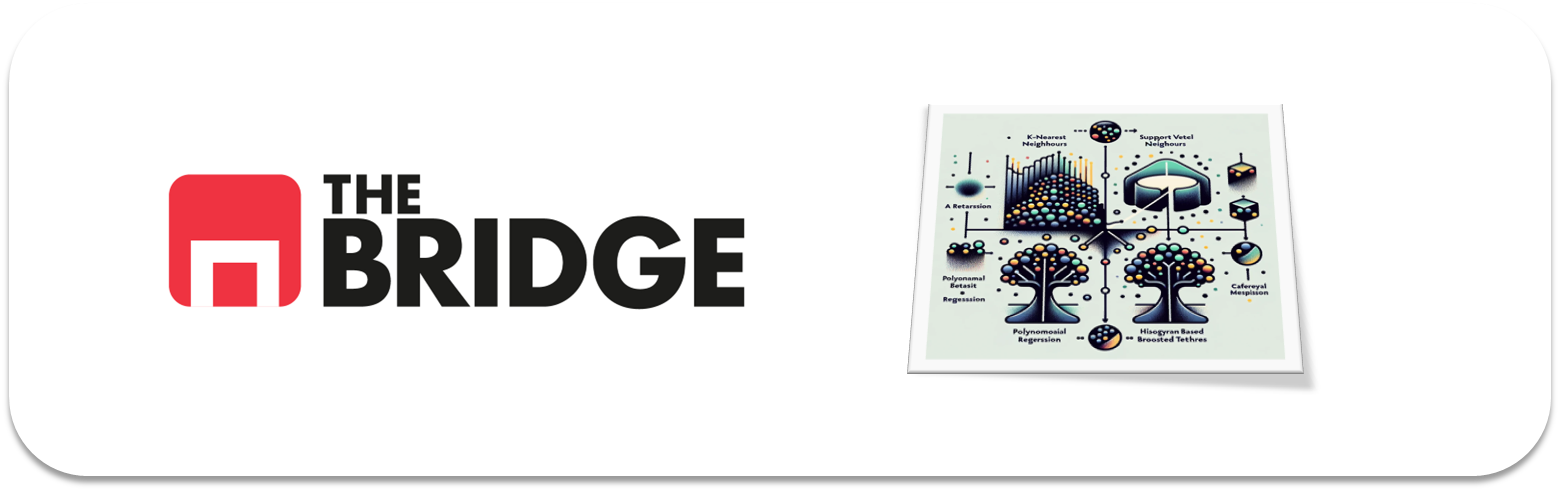

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [42]:
df = pd.read_csv(r"C:\Users\patri\REPO_PRUEBA\ONLINE_DS_THEBRIDGE_Patricia_Diez\Sprint_12\unidad_01\practica\credit_npo.csv")
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

#### **Variables**

**SeriousDlqin2yrs (int64):** Variable objetivo (0 o 1). Indica si el cliente ha experimentado una morosidad grave en los últimos 2 años.

**RevolvingUtilizationOfUnsecuredLines (float64):** crédito utilizado con respecto al crédito disponible. Un valor entre 0 y 1.

**Age (int64):** Edad del cliente.

**NumberOfTime30-59DaysPastDueNotWorse (int64):** Número de veces que el cliente ha estado 30-59 días deuda.

**DebtRatio (float64):** Relación entre la deuda mensual total y los ingresos mensuales.

**MonthlyIncome (float64):** Ingreso mensual del cliente.

**NumberOfOpenCreditLinesAndLoans (int64):** Número total de líneas de crédito abiertas y préstamos.

**NumberOfTimes90DaysLate (int64):** Número de veces que el cliente ha estado más de 90 días en restraso de pagos.

**NumberRealEstateLoansOrLines (int64):** Número de préstamos inmobiliarios o líneas de crédito .

**NumberOfTime60-89DaysPastDueNotWorse (int64):** Número de veces que el cliente ha estado 60-89 días deuda

**NumberOfDependents (float64):** Número de personas dependientes económicamente del cliente

In [50]:
def tipifica_variables(df, umbral_categoria, umbral_continua):
    """
    Asigna un tipo a las variables de un dataframe en base a su cardinalidad y porcentaje de cardinalidad.

        df: el dataframe a analizar
        umbral_categoria (int): Límite de veces que tiene que aparecer una variable para ser categórica
        umbral_continua (float): Porcentaje mínimo de cardinalidad que tiene que tener una variable para ser numérica continua
    
    """

    resultados = [] #se crea una lista vacía para meter los resultados

    for columna in df.columns: #coge cada columna en el dataframe
        cardinalidad = df[columna].nunique() #calcula la cardinalidad 
        porcentaje_cardinalidad = cardinalidad / len(df) #calcula el porcentaje 

        if cardinalidad == 2:
            tipo = "Binaria"
        elif (cardinalidad < umbral_categoria) and (cardinalidad != 2):
            tipo = "Categórica"
        elif porcentaje_cardinalidad >= umbral_continua:
            tipo = "Numérica Continua"
        else:
            tipo = "Numérica Discreta"

        resultados.append({"variable": columna, "tipo": tipo}) #mete en la lista de resultados la columna y el tipo que se le asigna 

    return pd.DataFrame(resultados)

In [53]:
tipifica_variables(df, 7, 15)

,variable,tipo
0,SeriousDlqin2yrs,Binaria
1,RevolvingUtilizationOfUnsecuredLines,Numérica Discreta
2,age,Numérica Discreta
3,NumberOfTime30-59DaysPastDueNotWorse,Numérica Discreta
4,DebtRatio,Numérica Discreta
5,MonthlyIncome,Numérica Discreta
6,NumberOfOpenCreditLinesAndLoans,Numérica Discreta
7,NumberOfTimes90DaysLate,Numérica Discreta
8,NumberRealEstateLoansOrLines,Numérica Discreta
9,NumberOfTime60-89DaysPastDueNotWorse,Numérica Discreta


In [52]:
df["NumberOfTime60-89DaysPastDueNotWorse"].value_counts()

NumberOfTime60-89DaysPastDueNotWorse
0     11901
1       492
2        86
98       21
3        18
4        14
5         4
11        1
Name: count, dtype: int64

In [56]:
#quito los nulos 
df = df.dropna()

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

C:\Users\patri\AppData\Local\Temp\ipykernel_13920\1145124939.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')


Text(0.5, 0, 'SeriousDlqin2yrs (0: No, 1: Sí)')

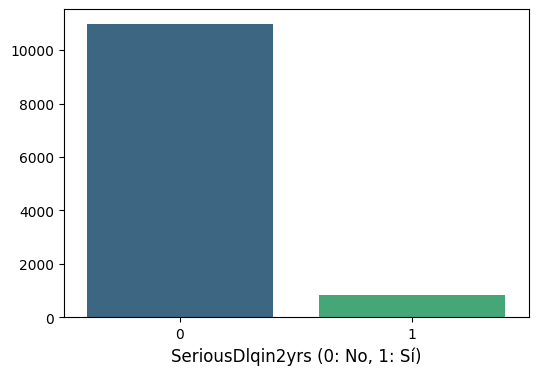

In [68]:
target = df["SeriousDlqin2yrs"]

import matplotlib.pyplot as plt
import seaborn as sns

target_counts = target.value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')


plt.xlabel('SeriousDlqin2yrs (0: No, 1: Sí)', fontsize=12)

C:\Users\patri\AppData\Local\Temp\ipykernel_13920\1145124939.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')


Text(0.5, 0, 'SeriousDlqin2yrs (0: No, 1: Sí)')

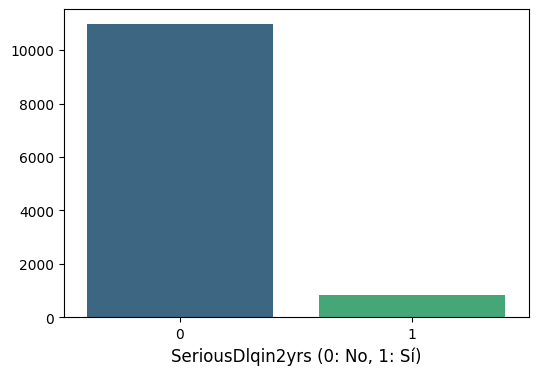

In [ ]:
target = df["SeriousDlqin2yrs"]

import matplotlib.pyplot as plt
import seaborn as sns

target_counts = target.value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')


plt.xlabel('SeriousDlqin2yrs (0: No, 1: Sí)', fontsize=12)

In [69]:
target.value_counts()

SeriousDlqin2yrs
0    10986
1      830
Name: count, dtype: int64

In [71]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

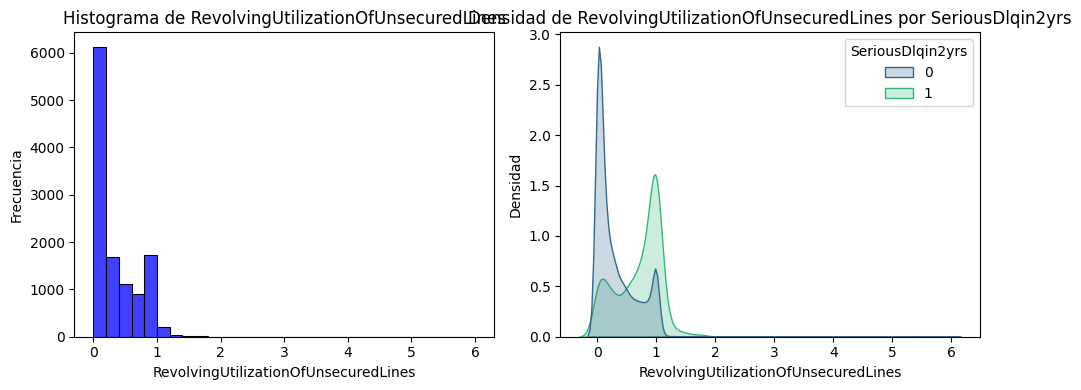

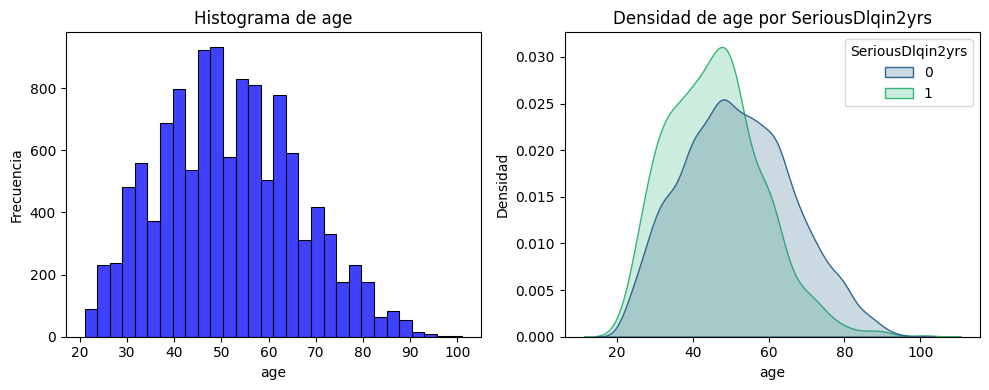

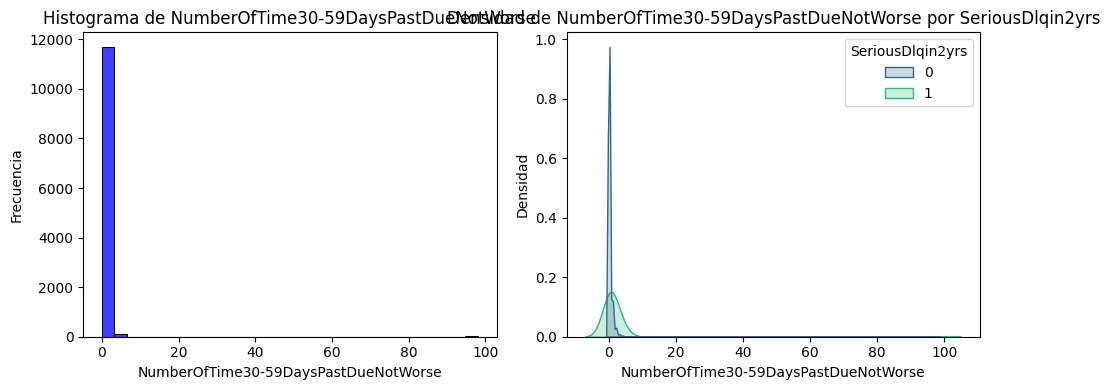

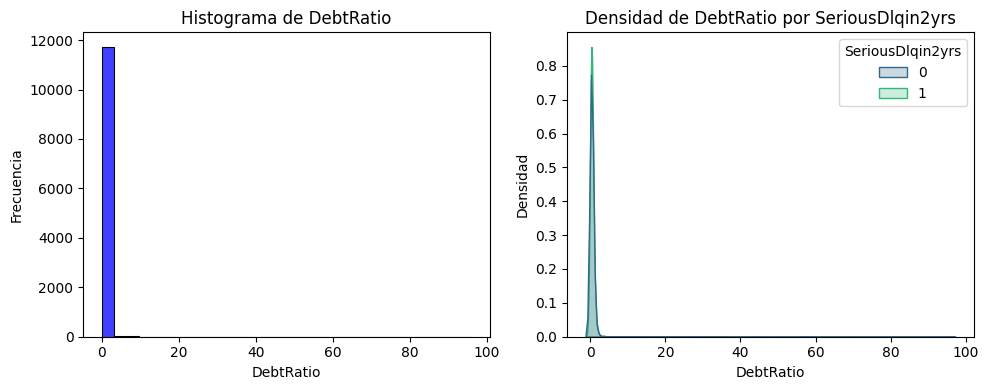

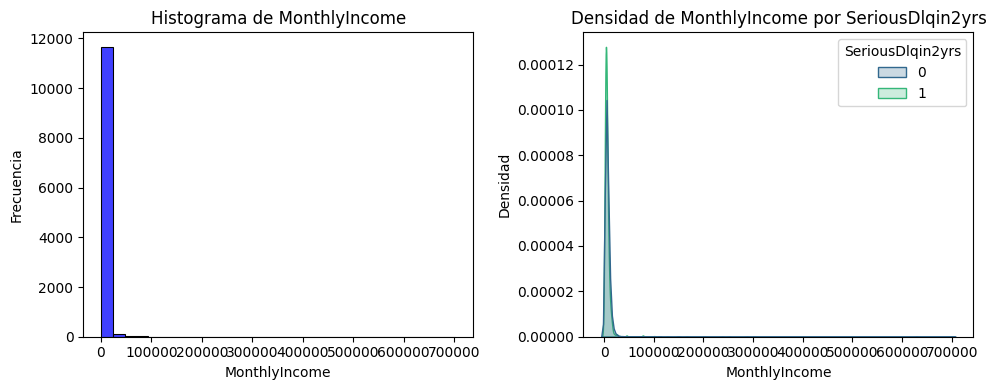

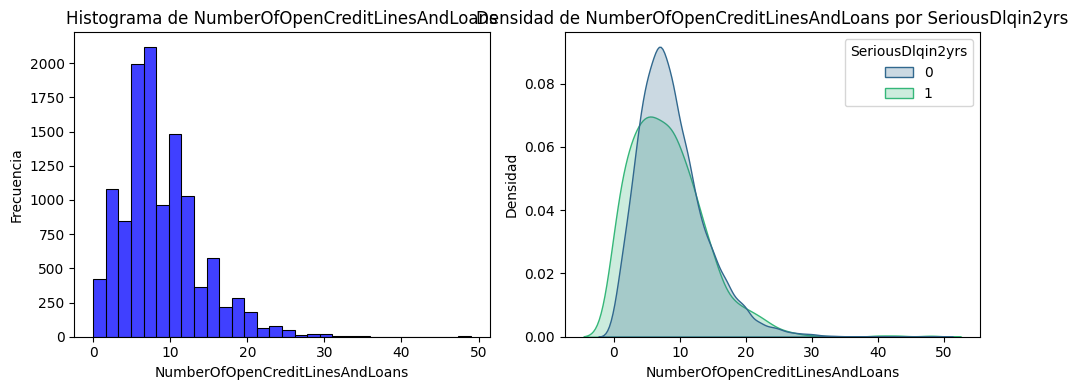

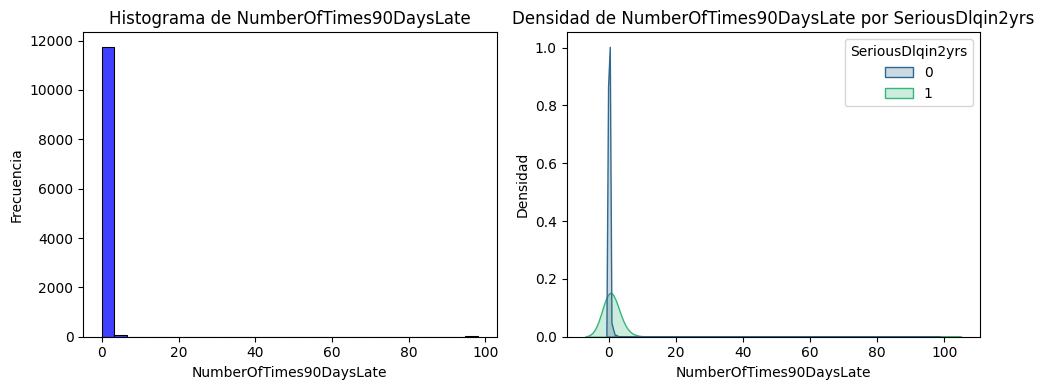

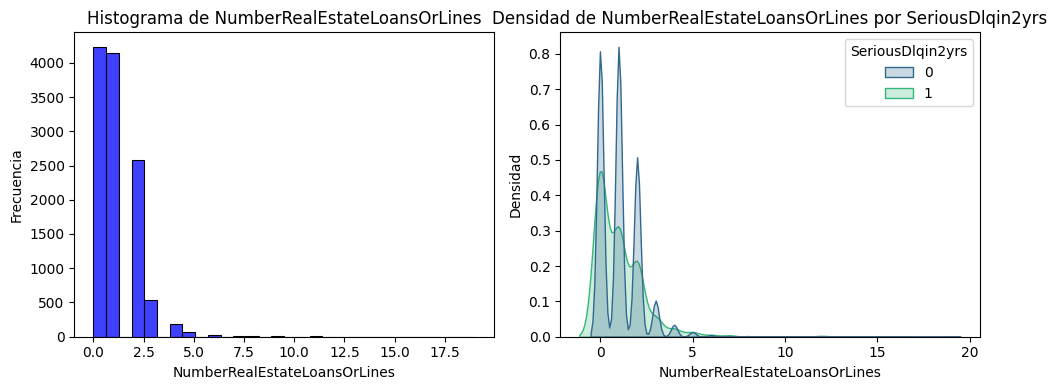

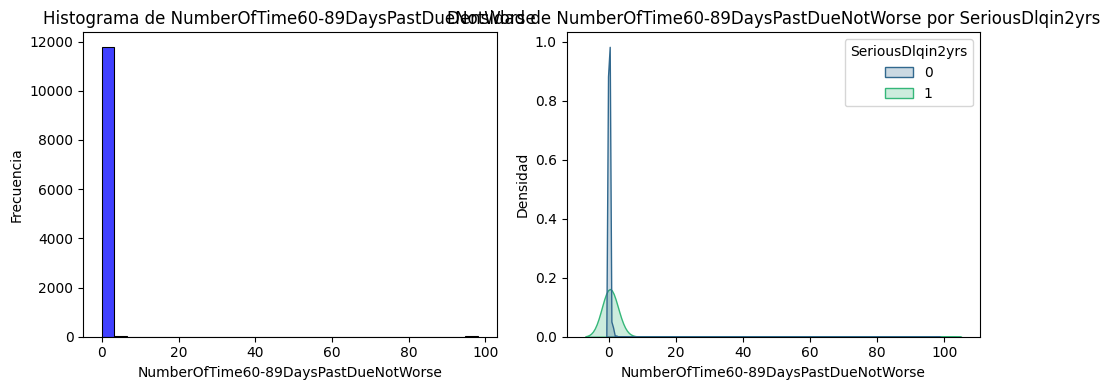

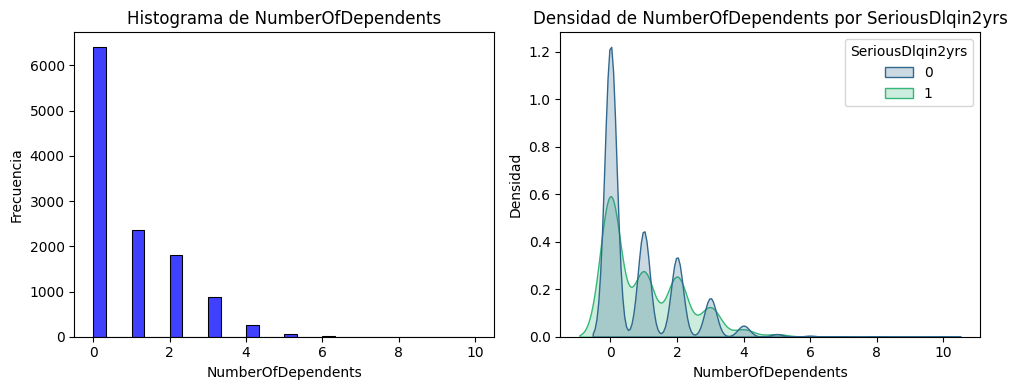

In [74]:
num_vars = [ 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'
       ]

import matplotlib.pyplot as plt
import seaborn as sns

# Crear gráficos para cada variable numérica
for var in num_vars:
    plt.figure(figsize=(10, 4))
    
    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], kde=False, bins=30, color='blue', edgecolor='k')
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

    # Gráfico de densidad separado por la variable objetivo
    plt.subplot(1, 2, 2)
    sns.kdeplot(data=df, x=var, hue='SeriousDlqin2yrs', fill=True, common_norm=False, palette='viridis')
    plt.title(f'Densidad de {var} por SeriousDlqin2yrs')
    plt.xlabel(var)
    plt.ylabel('Densidad')

    plt.tight_layout()
    plt.show()


### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

es un problema de clasificacion. La variable target es SeriousDlqin2yrs

### #1.3
Pinta la distribución de frecuencias del target y coméntala

C:\Users\patri\AppData\Local\Temp\ipykernel_13920\1145124939.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')


Text(0.5, 0, 'SeriousDlqin2yrs (0: No, 1: Sí)')

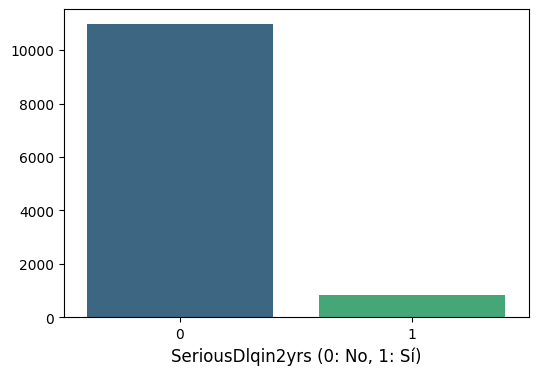

In [76]:
target = df["SeriousDlqin2yrs"]

import matplotlib.pyplot as plt
import seaborn as sns

target_counts = target.value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')


plt.xlabel('SeriousDlqin2yrs (0: No, 1: Sí)', fontsize=12)

In [78]:
#está muy desbalanceada

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['SeriousDlqin2yrs'])
y = df['SeriousDlqin2yrs']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [81]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


scorer = make_scorer(recall_score, average='macro')

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring=scorer)
    results[name] = scores
    print(f"{name}: Recall Medio = {np.mean(scores):.4f} ± {np.std(scores):.4f}")


Logistic Regression: Recall Medio = 0.5346 ± 0.0096
K-Nearest Neighbors: Recall Medio = 0.5666 ± 0.0129
Random Forest: Recall Medio = 0.5954 ± 0.0199


In [82]:
#random forest es el mejor modleo porque tiene el mejor recall

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


param_grid = {
    'n_estimators': [50, 100, 200],   # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],   # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],   # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4]      # Número mínimo de muestras para ser una hoja
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring='recall_macro',  
    cv=5,                    
    n_jobs=-1,               
    verbose=1                
)


grid_search.fit(X_train, y_train)


print("Mejores Hiperparámetros:", grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores Hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [84]:
best_rf = grid_search.best_estimator_


best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print(f"Recall en el conjunto de prueba: {recall:.4f}")


Recall en el conjunto de prueba: 0.1317


In [86]:
from sklearn.metrics import classification_report


report = classification_report(y_test, y_pred, target_names=['No', 'Sí'])


print(report)

              precision    recall  f1-score   support

          No       0.94      0.99      0.96      2197
          Sí       0.52      0.13      0.21       167

    accuracy                           0.93      2364
   macro avg       0.73      0.56      0.59      2364
weighted avg       0.91      0.93      0.91      2364



In [87]:
#el modelo está muy desbalanceado ya que identifica mucho mejor los 0 que los 1. 

#vamos a hacer oversampling

In [88]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


smote = SMOTE(sampling_strategy='minority', random_state=42)


X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


print("Distribución original de clases en y_train:", y_train.value_counts())
print("Distribución después de SMOTE:", pd.Series(y_train_resampled).value_counts())


Distribución original de clases en y_train: SeriousDlqin2yrs
0    8789
1     663
Name: count, dtype: int64
Distribución después de SMOTE: SeriousDlqin2yrs
0    8789
1    8789
Name: count, dtype: int64


In [89]:

best_rf.fit(X_train_resampled, y_train_resampled)


y_pred_resampled = best_rf.predict(X_test)


from sklearn.metrics import recall_score

recall_resampled = recall_score(y_test, y_pred_resampled)
print(f"Recall en el conjunto de prueba con oversampling: {recall_resampled:.4f}")


Recall en el conjunto de prueba con oversampling: 0.2994


In [92]:

report_resampled = classification_report(y_test, y_pred_resampled, target_names=['No', 'Sí'])
print(report_resampled)


              precision    recall  f1-score   support

          No       0.95      0.97      0.96      2197
          Sí       0.40      0.30      0.34       167

    accuracy                           0.92      2364
   macro avg       0.67      0.63      0.65      2364
weighted avg       0.91      0.92      0.91      2364



In [ ]:
#ha mejorado un poco 